# importing libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


# Loading dataset

In [18]:
# Loading dataset
df = pd.read_csv("datasets/supply_chain_dataset_5000.csv")
print(df.columns.tolist())
df


['Fabric_Type', 'Region', 'Cost_per_Unit(INR)', 'Transport_Time(days)', 'Distance_to_Base(km)', 'Demand_Units', 'Available_Stock', 'Supplier_Rating(1-5)', 'Risk_Factor(1-10)', 'Supply_Priority']


,Fabric_Type,Region,Cost_per_Unit(INR),Transport_Time(days),Distance_to_Base(km),Demand_Units,Available_Stock,Supplier_Rating(1-5),Risk_Factor(1-10),Supply_Priority
0,Kevlar,Hot Desert,1317.20,10.48,726.2,8816,11804,2.6,7.5,MEDIUM
1,Nylon,High Altitude,863.47,44.68,1402.7,14854,16190,4.5,6.1,MEDIUM
2,Bamboo Fibre,Coastal,263.06,7.11,277.5,8711,9040,2.0,3.4,LOW
3,Nylon,General Use,859.37,9.56,608.5,5456,5088,3.5,3.8,MEDIUM
4,Nylon,Jungle,677.14,18.57,1076.7,11018,8688,3.8,7.3,HIGH
...,...,...,...,...,...,...,...,...,...,...
4995,Cotton,Cold Desert,222.96,22.32,1266.1,9437,13394,3.7,9.9,MEDIUM
4996,Wool,High Altitude,1127.16,21.52,660.5,15286,22137,3.4,3.5,MEDIUM
4997,Nylon,Hot Desert,512.70,20.07,883.9,7424,7292,1.6,6.5,MEDIUM
4998,Wool,High Altitude,404.98,39.28,1459.7,13879,12489,4.6,5.8,MEDIUM


#  Basic Data Understanding

In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fabric_Type           5000 non-null   object 
 1   Region                5000 non-null   object 
 2   Cost_per_Unit(INR)    5000 non-null   float64
 3   Transport_Time(days)  5000 non-null   float64
 4   Distance_to_Base(km)  5000 non-null   float64
 5   Demand_Units          5000 non-null   int64  
 6   Available_Stock       5000 non-null   int64  
 7   Supplier_Rating(1-5)  5000 non-null   float64
 8   Risk_Factor(1-10)     5000 non-null   float64
 9   Supply_Priority       5000 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 390.8+ KB


Fabric_Type             0
Region                  0
Cost_per_Unit(INR)      0
Transport_Time(days)    0
Distance_to_Base(km)    0
Demand_Units            0
Available_Stock         0
Supplier_Rating(1-5)    0
Risk_Factor(1-10)       0
Supply_Priority         0
dtype: int64

# Encoding categorical features

In [4]:
# Encoding categorical features
le = LabelEncoder()

categorical_cols = ["Fabric_Type", "Region"]  # Adjust if needed

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


# Splitting features and target

In [5]:
# Splitting features and target

X = df.drop("Supply_Priority", axis=1)
y = df["Supply_Priority"]


 # Train‑Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


# Scale Numerical Features 

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#  Train Model (Random Forest Classifier)


In [8]:
model = RandomForestClassifier(
    n_estimators=350,
    max_depth=18,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,350
,criterion,'gini'
,max_depth,18
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#  Evaluate Model

Accuracy: 0.9728

Classification Report:
               precision    recall  f1-score   support

        HIGH       0.96      0.93      0.95       195
         LOW       0.94      0.98      0.96       150
      MEDIUM       0.98      0.98      0.98       905

    accuracy                           0.97      1250
   macro avg       0.96      0.96      0.96      1250
weighted avg       0.97      0.97      0.97      1250



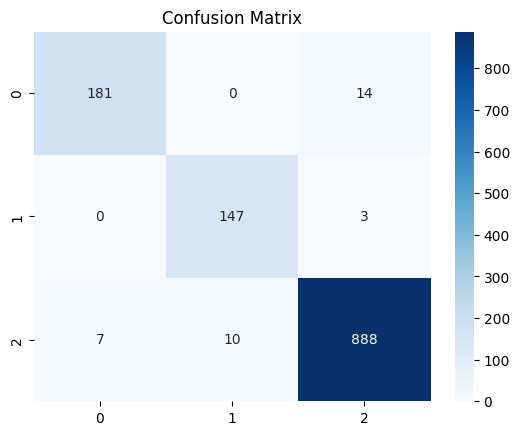

In [9]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


# Feature Importance Visualization


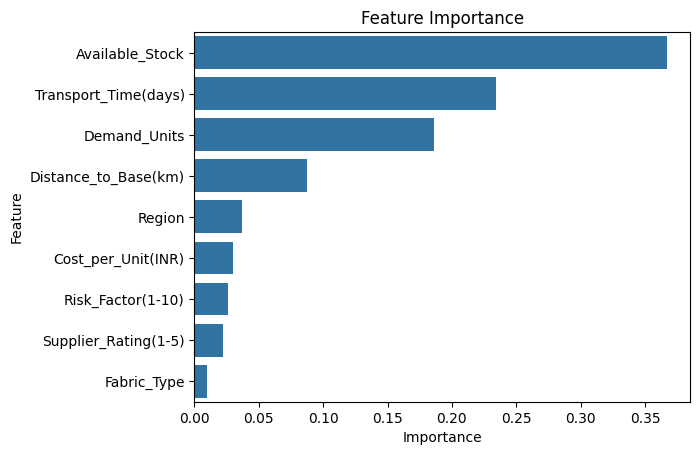

In [10]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()


# Save Trained Model + Scaler (For Backend Use)

In [ ]:
joblib.dump(model, "supply_chain_model.pkl")
joblib.dump(scaler, "supply_scaler.pkl")

print("Model saved successfully 🎉")


Model saved successfully 🎉


# Test with a Custom New Input 

In [12]:
# Example test input
new_data = pd.DataFrame([{
    "Fabric_Type": 2,   # Nylon example after label encoding
    "Cost_per_Unit(INR)": 1200,
    "Available_Stock": 4000,
    "Transport_Time(days)": 14,
    "Distance_to_Base(km)": 750,
    "Demand_Units": 9000,
    "Region": 3,
    "Supplier_Rating(1-5)": 4,
    "Risk_Factor(1-10)": 6
}])

# Ensure the new input has the exact same columns in the same order as the training data
new_data = new_data.reindex(columns=X.columns)

# Optional: guard against missing columns after reindexing
if new_data.isnull().any().any():
    raise ValueError("New input is missing required features or has mismatched column names. "
                     "Check that new_data columns match X.columns exactly.")

# Scale numerical data
new_data_scaled = scaler.transform(new_data)

pred = model.predict(new_data_scaled)
print("Predicted Supply Priority →", pred[0])


Predicted Supply Priority → MEDIUM


In [13]:
test_case_1 = pd.DataFrame([{
    "Fabric_Type": 1,   # Example: Cotton (encoded)
    "Cost_per_Unit(INR)": 350,
    "Available_Stock": 12000,
    "Transport_Time(days)": 5,
    "Distance_to_Base(km)": 120,
    "Demand_Units": 3000,
    "Region": 2,  # Example region encoding
    "Supplier_Rating(1-5)": 4.5,
    "Risk_Factor(1-10)": 2
}])

test_case_1 = test_case_1.reindex(columns=X.columns)
pred_1 = model.predict(scaler.transform(test_case_1))
print("Prediction →", pred_1[0])


Prediction → LOW


In [14]:
test_case_2 = pd.DataFrame([{
    "Fabric_Type": 4,   # Example: Wool
    "Cost_per_Unit(INR)": 1200,
    "Available_Stock": 5000,
    "Transport_Time(days)": 12,
    "Distance_to_Base(km)": 850,
    "Demand_Units": 6000,
    "Region": 1,
    "Supplier_Rating(1-5)": 3.5,
    "Risk_Factor(1-10)": 5
}])

test_case_2 = test_case_2.reindex(columns=X.columns)
pred_2 = model.predict(scaler.transform(test_case_2))
print("Prediction →", pred_2[0])


Prediction → MEDIUM


In [15]:
test_case_3 = pd.DataFrame([{
    "Fabric_Type": 0,  # Example: Kevlar
    "Cost_per_Unit(INR)": 2200,
    "Available_Stock": 1500,
    "Transport_Time(days)": 27,
    "Distance_to_Base(km)": 1800,
    "Demand_Units": 9000,
    "Region": 3,
    "Supplier_Rating(1-5)": 2,
    "Risk_Factor(1-10)": 9
}])

test_case_3 = test_case_3.reindex(columns=X.columns)
pred_3 = model.predict(scaler.transform(test_case_3))
print("Prediction →", pred_3[0])


Prediction → HIGH


In [16]:
test_case_2 = pd.DataFrame([{
    "Fabric_Type": 1,   # Bamboo Fibre (example)
    "Cost_per_Unit(INR)": 380,
    "Available_Stock": 9500,
    "Transport_Time(days)": 5,
    "Distance_to_Base(km)": 180,
    "Demand_Units": 2200,
    "Region": 2,  # Coastal encoded example
    "Supplier_Rating(1-5)": 4,
    "Risk_Factor(1-10)": 2
}])

# Match column order
test_case_2 = test_case_2.reindex(columns=X.columns)

# Scale
test_case_2_scaled = scaler.transform(test_case_2)

# Predict
print("Prediction (Test Case 2):", model.predict(test_case_2_scaled)[0])


Prediction (Test Case 2): LOW


In [17]:
test_case_3 = pd.DataFrame([{
    "Fabric_Type": 4,  # Kevlar (encoded example)
    "Cost_per_Unit(INR)": 1800,
    "Available_Stock": 1200,
    "Transport_Time(days)": 21,
    "Distance_to_Base(km)": 1600,
    "Demand_Units": 15000,
    "Region": 0,  # High Altitude encoded example
    "Supplier_Rating(1-5)": 3,
    "Risk_Factor(1-10)": 9
}])

# Match column order
test_case_3 = test_case_3.reindex(columns=X.columns)

# Scale
test_case_3_scaled = scaler.transform(test_case_3)

# Predict
print("Prediction (Test Case 3):", model.predict(test_case_3_scaled)[0])


Prediction (Test Case 3): HIGH
